# Задача 1

Пусть $X_1, X_2, \ldots, X_n$ — выборка из экспоненциального распределения с параметром $\lambda$. Найти оценку максимального правдоподобия параметра $\lambda$, сравнить ее с байесовской оценкой (MAP и математическое ожидание апостреорного распределения), подобрав сопряженное распределение. Сравнить полученные байесовские оценки с оценкой MLE. Найти предсказательное распределение

## Решение: 

Пусть  
$$
X_1, X_2, \ldots, X_n \stackrel{}{\sim} \text{Exp}(\lambda),
$$
где плотность имеет вид
$$
f(x \mid \lambda) = \lambda e^{-\lambda x}, \quad x \ge 0,\ \lambda > 0.
$$

Обозначим
$$
S = \sum_{i=1}^n X_i.
$$

---

## 1. Оценка максимального правдоподобия (MLE)

Функция правдоподобия:
$$
L(\lambda) = \prod_{i=1}^n \lambda e^{-\lambda X_i}
= \lambda^n e^{-\lambda S}.
$$

Логарифм правдоподобия:
$$
\ell(\lambda) = n \ln \lambda - \lambda S.
$$

Находим максимум:
$$
\frac{d\ell}{d\lambda} = \frac{n}{\lambda} - S = 0
\quad \Rightarrow \quad
\hat{\lambda}_{\text{MLE}} = \frac{n}{S} = \frac{1}{\bar X}.
$$

---

## 2. Сопряжённое априорное распределение

Для экспоненциального распределения сопряжённым является **гамма-распределение**:
$$
\lambda \sim \text{Gamma}(\alpha, \beta),
$$
с плотностью
$$
p(\lambda) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta \lambda},
$$
где $\alpha > 0$ — параметр формы, $\beta > 0$ — параметр масштаба (rate).

---

## 3. Апостериорное распределение

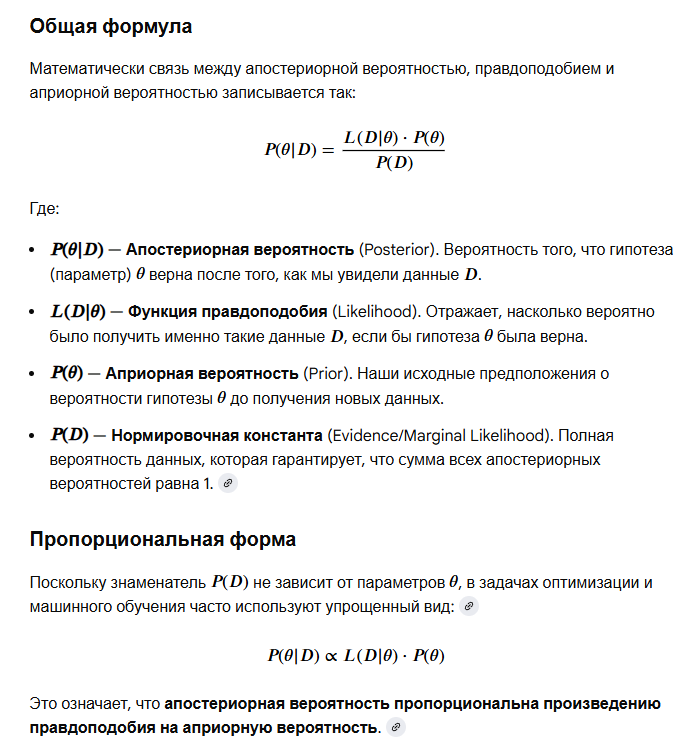

По формуле Байеса, апостериорная вероятность::
$$
p(\lambda \mid X) \propto L(\lambda)\,p(\lambda).
$$

Подставляя:
$$
p(\lambda \mid X)
\propto
\lambda^n e^{-\lambda S} \cdot \lambda^{\alpha-1} e^{-\beta \lambda}
=
\lambda^{\alpha+n-1} e^{-(\beta+S)\lambda}.
$$

Следовательно,
$$
\lambda \mid X \sim \text{Gamma}(\alpha + n,\; \beta + S).
$$

---

## 4. Байесовские оценки

### MAP-оценка (максимум апостериорной плотности)

Для гамма-распределения:
$$
\lambda_{\text{MAP}} = \frac{\alpha + n - 1}{\beta + S},
\quad \text{при } \alpha + n > 1.
$$

---

### Байесовская оценка по среднему (MMSE)

Математическое ожидание апостериорного распределения:
$$
\mathbb{E}[\lambda \mid X] = \frac{\alpha + n}{\beta + S}.
$$

---

## 5. Сравнение с MLE

MLE:
$$
\hat{\lambda}_{\text{MLE}} = \frac{n}{S}.
$$

Байесовские оценки:
$$
\lambda_{\text{MAP}} = \frac{\alpha + n - 1}{\beta + S}, \quad
\mathbb{E}[\lambda \mid X] = \frac{\alpha + n}{\beta + S}.
$$

### Наблюдения:
- При слабом априорном распределении  
  (например, $\alpha \to 0, \beta \to 0$):
  $$
  \lambda_{\text{MAP}} \approx \frac{n-1}{S}, \quad
  \mathbb{E}[\lambda \mid X] \approx \frac{n}{S} = \hat{\lambda}_{\text{MLE}}.
  $$
- При большом $n$ влияние априорного распределения исчезает, и все оценки сходятся.
- Байесовские оценки «сглаживают» MLE за счёт априорной информации.

---

## 6. Предсказательное распределение

Для нового наблюдения $X_{n+1}$:
$$
p(x \mid X) = \int_0^\infty p(x \mid \lambda)\,p(\lambda \mid X)\,d\lambda.
$$

Подставляя:
$$
p(x \mid X)
=
\int_0^\infty
\lambda e^{-\lambda x}
\cdot
\text{Gamma}(\alpha+n,\beta+S)\,d\lambda.
$$

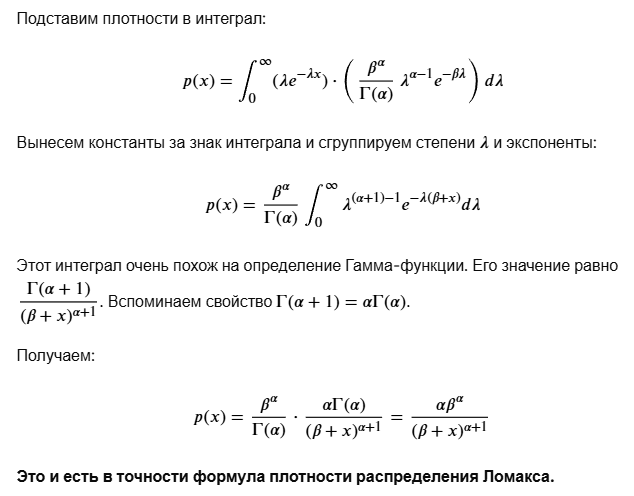

Результат интегрирования:
$$
X_{n+1} \mid X \sim \text{Lomax}(\alpha+n,\; \beta+S),
$$
с плотностью
$$
p(x \mid X) =
\frac{(\alpha+n)(\beta+S)^{\alpha+n}}
{(\beta+S+x)^{\alpha+n+1}}, \quad x \ge 0.
$$

---

## 7. Итог

- **MLE**:  
  $$
  \hat{\lambda}_{\text{MLE}} = \frac{n}{S}
  $$
- **MAP**:  
  $$
  \lambda_{\text{MAP}} = \frac{\alpha+n-1}{\beta+S}
  $$
- **Байесовская оценка по среднему**:  
  $$
  \mathbb{E}[\lambda \mid X] = \frac{\alpha+n}{\beta+S}
  $$
- **Предсказательное распределение** — распределение Ломакса


# Задача 2

**Мультиномиальное распределение**

Пусть проводится серия из $n$ испытаний и в результате каждого испытания происходит ровно одно событие из набора $A_1, A_2, \dots, A_m$, причем вероятности этих событий равны соответственно $\mathsf{p}_1, \mathsf{p}_2, \dots, \mathsf{p}_m$, причем
$$\sum_{i=1}^{m}\mathsf{p}_i = 1.$$

Тогда совместное распределение величин $X_1, X_2, \dots, X_m$, где $X_k$ — число наступлений события $A_k$ в серии из $n$ испытаний, задается вероятностями

$$
\mathsf{P}\left(X_1 = n_1, \dots, X_m = n_m, \right) = \frac{n!}{n_1!\dots n_m!}\mathsf{p}_1^{n_1}\dots \mathsf{p}_m^{n_m},
$$

где $n_1, n_2, \dots, n_m$ — произвольный набор целых неотрицательных чисел, таких что

$$\sum_{i=1}^m n_i = n.$$

Произведите байесовский вывод для мультиномиального распределения: найдите апостериорное распределение, используя в качестве сопоряженного распределения к правдоподобию [распределение Дирихле](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%94%D0%B8%D1%80%D0%B8%D1%85%D0%BB%D0%B5), найдите предсказательное распределение. Объясните результат.

## Решение

Рассмотрим серию из $n$ независимых испытаний.  
В каждом испытании происходит ровно одно событие из множества  
$A_1, A_2, \dots, A_m$ с вероятностями
$$
\mathbf{p} = (p_1, \dots, p_m), \qquad p_i \ge 0,\quad \sum_{i=1}^m p_i = 1.
$$

Пусть
$$
X_i = \text{число наступлений события } A_i,\quad i=1,\dots,m,
$$
и
$$
\sum_{i=1}^m X_i = n.
$$

---

## 1. Правдоподобие (мультиномиальное распределение)

Совместное распределение вектора счётчиков $X = (X_1,\dots,X_m)$ имеет вид:
$$
p(X \mid \mathbf{p})
=
\mathsf{P}(X_1=n_1,\dots,X_m=n_m \mid \mathbf{p})
=
\frac{n!}{n_1!\cdots n_m!}
\prod_{i=1}^m p_i^{n_i}.
$$

С точки зрения байесовского вывода коэффициент
$\frac{n!}{n_1!\cdots n_m!}$ не зависит от $\mathbf{p}$, поэтому
**правдоподобие** по $\mathbf{p}$ пропорционально
$$
L(\mathbf{p})
\propto
\prod_{i=1}^m p_i^{n_i}.
$$

---

## 2. Априорное распределение: распределение Дирихле

Сопряжённым априорным распределением к мультиномиальному является
**распределение Дирихле**:
$$
\mathbf{p} \sim \text{Dir}(\alpha_1,\dots,\alpha_m),
$$
с плотностью
$$
p(\mathbf{p})
=
\frac{1}{B(\boldsymbol{\alpha})}
\prod_{i=1}^m p_i^{\alpha_i - 1},
\quad
\alpha_i > 0,
$$
где $B(\boldsymbol{\alpha})$ — многомерная бета-функция.

### Интерпретация параметров
- $\alpha_i$ можно интерпретировать как **псевдонаблюдения** категории $i$
- сумма $\sum_i \alpha_i$ — сила априорного знания

---

## 3. Апостериорное распределение

По формуле Байеса:
$$
p(\mathbf{p} \mid X)
\propto
p(X \mid \mathbf{p})\,p(\mathbf{p}).
$$

Подставляем:
$$
p(\mathbf{p} \mid X)
\propto
\left(\prod_{i=1}^m p_i^{n_i}\right)
\left(\prod_{i=1}^m p_i^{\alpha_i - 1}\right)
=
\prod_{i=1}^m p_i^{\alpha_i + n_i - 1}.
$$

Следовательно,
$$
\boxed{
\mathbf{p} \mid X
\sim
\text{Dir}(\alpha_1 + n_1,\dots,\alpha_m + n_m)
}
$$

---

## 4. Байесовские оценки вероятностей

### Апостериорное математическое ожидание
$$
\mathbb{E}[p_i \mid X]
=
\frac{\alpha_i + n_i}{\sum_{j=1}^m (\alpha_j + n_j)}.
$$

---

### MAP-оценка
Если $\alpha_i + n_i > 1$:
$$
p_i^{\text{MAP}}
=
\frac{\alpha_i + n_i - 1}
{\sum_{j=1}^m (\alpha_j + n_j) - m}.
$$

---

## 5. Предсказательное распределение

Рассмотрим новое испытание $X_{n+1}$.

Предсказательная вероятность события $A_k$:
$$
\mathsf{P}(X_{n+1} = A_k \mid X)
=
\int p_k \, p(\mathbf{p} \mid X)\, d\mathbf{p}.
$$

Так как $\mathbf{p} \mid X$ имеет распределение Дирихле,
$$
\boxed{
\mathsf{P}(X_{n+1} = A_k \mid X)
=
\frac{\alpha_k + n_k}{\sum_{j=1}^m (\alpha_j + n_j)}
}
$$

---

## 6. Предсказательное распределение для нескольких наблюдений

Для $N$ будущих испытаний предсказательное распределение счётчиков
$(\tilde n_1,\dots,\tilde n_m)$ имеет вид:

$$
(\tilde n_1,\dots,\tilde n_m) \sim
\text{Dirichlet–Multinomial}
\left(
N,\;
\alpha_1+n_1,\dots,\alpha_m+n_m
\right).
$$

---

## 7. Объяснение результата

1. **Дирихле — сопряжённый априор к мультиномиальному распределению, поэтому апостериор тоже Дирихле**

2. **Параметры апостериора = априорные псевдонаблюдения + реальные наблюдения**

3. **Сглаживание**
   - даже если $n_i = 0$, вероятность события не равна нулю
   - решает проблему нулевых частот

4. **Предсказание честное**
   - мы не подставляем одну точку $\mathbf{p}$
   - мы усредняем по всей неопределённости в $\mathbf{p}$

